## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
gold = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gold.csv')
lh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lh.csv')

In [8]:
train

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1
...,...,...
24969,49939,0
24970,49940,1
24971,49941,1
24972,49945,0


In [9]:
gold

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302
...,...,...,...,...,...,...,...,...,...,...,...,...
499475,49947,360,2640,1356,4493,3186,2720,2244,1236,2150,2232,2850
499476,49947,420,3176,1854,5259,3336,3299,2706,1449,2541,2621,3345
499477,49947,480,3760,2005,6313,3487,3450,3171,1600,3360,3184,3865
499478,49947,540,4041,2155,7999,4242,3724,3541,2271,3883,3453,4513


In [10]:
lh

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...
499475,49947,360,25,4,27,7,27,20,4,21,19,21
499476,49947,420,31,9,35,7,35,26,5,27,24,27
499477,49947,480,39,9,46,7,35,31,5,29,28,34
499478,49947,540,41,9,61,8,37,36,5,31,30,42


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [11]:
train.describe()

,mid,radiant_won
count,24974.000000,24974.00000
mean,24942.459438,0.51950
std,14361.284458,0.49963
min,0.000000,0.00000
25%,12667.500000,0.00000
50%,24799.000000,1.00000
75%,37379.750000,1.00000
max,49946.000000,1.00000


In [12]:
gold.describe()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
count,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000
mean,24973.500000,330.000000,2152.879521,2112.797529,2120.570878,2116.597137,2095.115032,2149.376213,2107.449756,2118.370077,2115.818952,2095.134958
std,14418.760054,172.337052,1431.458854,1411.442322,1419.522401,1415.875042,1400.156863,1422.172571,1397.235123,1407.115226,1402.126988,1388.890193
min,0.000000,60.000000,168.000000,240.000000,169.000000,222.000000,240.000000,149.000000,187.000000,143.000000,166.000000,159.000000
25%,12486.750000,180.000000,1010.000000,987.000000,990.000000,986.000000,978.000000,1013.750000,992.000000,996.000000,996.000000,984.000000
50%,24973.500000,330.000000,1876.000000,1837.000000,1842.000000,1842.000000,1821.000000,1878.000000,1839.000000,1847.000000,1847.000000,1830.000000
75%,37460.250000,480.000000,3006.000000,2942.000000,2953.000000,2946.000000,2915.000000,2997.000000,2937.000000,2952.000000,2951.000000,2919.000000
max,49947.000000,600.000000,15046.000000,16572.000000,12546.000000,13857.000000,13802.000000,18518.000000,13085.000000,14848.000000,12453.000000,17083.000000


In [13]:
lh.describe()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
count,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000,499480.000000
mean,24973.500000,330.000000,14.600811,14.051702,14.095706,14.038999,13.843301,14.630624,14.032918,14.160285,14.111047,13.919018
std,14418.760054,172.337052,14.283622,14.112557,14.158419,14.122440,14.009822,14.252887,14.043370,14.122826,14.039850,13.959072
min,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12486.750000,180.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,24973.500000,330.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,37460.250000,480.000000,23.000000,21.000000,21.000000,21.000000,20.000000,23.000000,21.000000,21.000000,21.000000,20.000000
max,49947.000000,600.000000,113.000000,129.000000,131.000000,116.000000,119.000000,112.000000,127.000000,114.000000,108.000000,108.000000


Пропусков в данных не обнаружено, так что порассуждаем.
Логично было ожидать пропуски в колонках $player_i$ в датасетах $gold$ и $ls$.
Колонка $times$ всегда имеет ожидаемый формат, пропуски в ней нас не интересуют.

1. Первое соображение заключается в следующем: матожидания показателей у игроков с разными номерами совпадают. Иначе говоря, $player_i$ и $player_j$ в среднем ведут себя одинаково, а, значит, для анализа поведения игрока как такового, можно обойтись колонкой $player_0$. Это соображение вытекает из анализа приведеных выше таблиц, где мы можем убедиться, что показатели $mean, std, median$ и т.д у различных игроков сравнимы.

2. Разумеется, нам не хотелось бы выкидывать из таблицы данные из-за нескольких пропусков в показателях игрока на какое-то время матча, поэтому хотелось бы научиться их восстанавливать. Первое, что приходит на ум: если пропуск случился, скажем, на 300-й секунде матча, а у нас есть данные за 240-ю и 360-ю, вполне интуитивным кажется взять среднее двух показателей и записать его в ячейку с пропущенными данными. Такой подход вполне оправдан в предположении, что процесс накопления игроком золота/убитых крипов происходит равномерно в течение всего матча. Проверим эту гипотезу, рассмотрев выборочное среднее для прироста показателей для каждой минуты игры

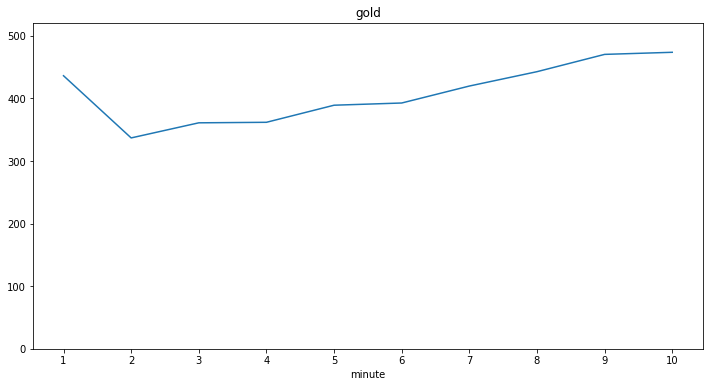

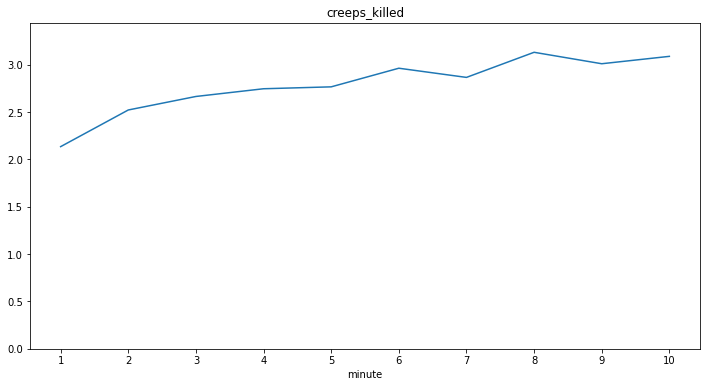

In [14]:
def DisplayFeatureTimeDiffDistribution(data, feature_name):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot()
    ax1.set_title(feature_name)
    result = np.zeros(10)
    i = 0
    prev = 0
    games_count = 0
    for value in data:
        result[i] += value - prev
        prev = value
        i += 1
        if i == 10:
            prev = i = 0
            games_count += 1
    result /= games_count
    ax1.set_xticks(np.arange(1, 11))
    ax1.set_xlabel('minute')
    ax1.set_ylim(0, result.max() * 1.1)
    ax1.plot(np.arange(1, 11), result)
    
DisplayFeatureTimeDiffDistribution(gold['player_0'], 'gold')
DisplayFeatureTimeDiffDistribution(lh['player_0'], 'creeps_killed')

Из приведенных графиков видно, что распределение показателей по минутам не является равномерным, но довольно близкО к нему, а, значит, описанная выше стратегия вполне может быть применима для заполнения пропусков.

До сих пор мы рассматривали лишь простые для обработки пропуски данных, для которых значения соседей известны.
А что делать, если данные по минутам выглядят как-то так: $[-1, 3, -1, -1, 9, -1, -1, 14, -1, -1]$

Нашу стратегию можно масштабировать и для подобных случаев: 
1. Все пропуски между двумя минутами, показатели для которых известны, заполняем равномерно (с округлением, при надобности). В приведенном примере данные дополнятся следующим образом:
$$[-1, 3, -1, -1, 9, -1, -1, 14, -1, -1] \rightarrow [-1, 3, \boldsymbol{5}, \boldsymbol{7}, 9, \boldsymbol{11}, \boldsymbol{12}, 14, -1, -1]$$
2. Остается заполнить данные для минут, у которых не оказалось заполненного соседа слева (справа). Опишем алгоритм заполнения правых ячеек, для левых все действия выполняются по аналогии. Находим самую правую минуту (обозначим ее номер за m), для которой показатель известен, и заполняем ячейки справа налево, как если бы каждую минуту игрок добавлял $feature[m] / m$ к своему показателю:
$$[-1, 3, 5, 7, 9, 11, 12, 14, -1, -1] \rightarrow [\boldsymbol{2}, 3, 5, 7, 9, 11, 12, 14, \boldsymbol{16}, \boldsymbol{18}]$$
3. Остается лишь рассмотреть случай, когда показатель у игрока неизвестен на каждую минуту игры. Тут можно поступить просто: заполнить данные средними по всей выборке (которые как раз отображены на графиках выше)

Ниже приведен набросок соответствующего кода

In [15]:
def FillTheGaps(match_data, defaults = np.array([1] * 10)):
    """
    функция, принимающая на вход данные признака игрока на каждую минуту матча и заполняющая в них пропуски
    :match_data: значение признака игрока по минутам
    :defaults: усредненные показатели по данному признаку
    """
    prev_i = -1
    for i in range(match_data.size):
        if match_data[i] >= 0:
            step = (match_data[i] - match_data[prev_i]) / (i - prev_i)
            for j in range(prev_i + 1, i):
                match_data[j] = round(match_data[prev_i] + step * (j - prev_i))
            prev_i = i
    if (prev_i == -1):
        for i in range(match_data.size):
            match_data[i] = defaults[i]
    else:
        step = match_data[prev_i] / (prev_i + 1)
        for j in range(prev_i + 1, match_data.size):
            match_data[j] = round(match_data[prev_i] + step * (j - prev_i))
    
example = np.array([-1, 3, -1, -1, 9, -1, -1, 14, -1, -1])
print(example, end=' -> ')
FillTheGaps(example)
print(example)
example = np.array([-1] * 10)
print(example, end=' -> ')
FillTheGaps(example, defaults=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
print(example)

[-1  3 -1 -1  9 -1 -1 14 -1 -1] -> [ 1  3  5  7  9 11 12 14 16 18]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] -> [ 1  2  3  4  5  6  7  8  9 10]


Разумеется, можно придумать более хитрые способы заполнения пропусков, учитывающие особенности распределения прироста признаков по минутам. Однако описанный выше способ кажется мне оптимально сбалансированным по сложности и эффективности

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [16]:
train.shape

(24974, 2)

In [17]:
last_gold = gold[gold['times'] == 600].reset_index(drop=True).drop(columns=('times')).set_index('mid')
last_lh = lh[lh['times'] == 600].reset_index(drop=True).drop(columns=('times')).set_index('mid')
new_train = train.set_index('mid').join(last_gold).join(last_lh, lsuffix='_gold', rsuffix='_lh')
new_train

,radiant_won,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
mid,,,,,,,,,,,,,,,,,,,,,
0,1,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46
1,0,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39
2,1,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12
4,1,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6
5,1,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0,4262,7316,3996,3863,2199,5718,3876,4296,4497,2520,49,74,30,12,2,47,5,35,39,4
49940,1,7250,3984,6380,2954,6243,3095,5105,1811,4823,2471,48,2,54,12,61,26,71,4,49,5
49941,1,2873,4727,4655,4923,3645,5978,2801,3875,4644,5213,31,54,42,52,7,49,1,10,16,53


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

In [18]:
def GenerateNewFeatures(df):
    indicators = ['gold', 'lh']
    for indicator in indicators:
        r_columns = [f'player_{i}_{indicator}' for i in range(5)]
        d_columns = [f'player_{i}_{indicator}' for i in range(5, 10)]
        # total
        r_total = df[r_columns].sum(axis=1)
        d_total = df[d_columns].sum(axis=1)
        df[f'total_{indicator}_ratio'] = r_total / d_total
        #std
        df['r_std_' + indicator] = df[r_columns].std(axis=1)
        df['d_std_' + indicator] = df[d_columns].std(axis=1)
        df[f'std_{indicator}_ratio'] = df['r_std_' + indicator] / df['d_std_' + indicator]

    
GenerateNewFeatures(new_train)
new_train

,radiant_won,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,total_gold_ratio,r_std_gold,d_std_gold,std_gold_ratio,total_lh_ratio,r_std_lh,d_std_lh,std_lh_ratio
mid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46,0.970989,1276.224784,1848.063716,0.690574,0.770833,24.613005,26.235472,0.938157
1,0,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39,0.903366,1390.344382,1771.920625,0.784654,1.090278,23.733942,17.412639,1.363030
2,1,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12,1.375868,2568.891259,1167.758237,2.199849,1.757576,23.402991,20.425474,1.145775
4,1,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6,1.031686,1153.336161,828.283285,1.392442,1.415842,16.288032,12.755391,1.276953
5,1,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14,0.726691,964.241567,947.362761,1.017817,0.662069,16.664333,17.916473,0.930112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0,4262,7316,3996,3863,2199,5718,3876,4296,4497,2520,49,74,30,12,2,47,5,35,39,4,1.034869,1856.851286,1154.057538,1.608976,1.284615,28.927496,20.099751,1.439197
49940,1,7250,3984,6380,2954,6243,3095,5105,1811,4823,2471,48,2,54,12,61,26,71,4,49,5,1.549321,1807.925386,1448.649026,1.248008,1.141935,26.566897,28.956864,0.917465
49941,1,2873,4727,4655,4923,3645,5978,2801,3875,4644,5213,31,54,42,52,7,49,1,10,16,53,0.925014,876.095200,1223.804600,0.715878,1.441860,19.201562,23.657980,0.811632


Были построены агрегаты:
1. total_gold_ratio, total_lh_ratio - Отношение суммарно собранного золота (убитых крипов)
командой radiant к команде dire
2. r_std_gold, d_std_gold, r_std_lh, d_std_lh - стандартное отклонение собранного золота (убитых крипов)
для команды radiant/dire
3. std_gold_ratio, std_lh_ratio - Отношение описанного выше стандартного отклонения команды
radiant к команде dire
    
При построении агрегатов я старался следовать 3 принципам, направленным на улучшение качества/скорости используемых в работе алгоритмов:
1. Потенциальная информативность новых признаков
2. Новые признаки не являются линейными комбинациями существующих
3. Количество новых признаков должно быть умеренным

Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [19]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [20]:
X = new_train.drop(columns='radiant_won')
y = new_train['radiant_won']

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
C_values = np.linspace(0.05, 2.01, 20)
parameters = {'C': C_values}
clf_log_reg = GridSearchCV(log_reg, parameters, scoring='roc_auc', n_jobs=-1, verbose=True)
clf_log_reg.fit(X, y)
clf_log_reg.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.7s finished


0.712382233579393

In [ ]:
log_reg_best_score = clf_log_reg.best_score_
log_reg_best_C = clf_log_reg.best_params_['C']
log_reg_best_std = clf_log_reg.cv_results_['std_test_score'][list(C_values).index(log_reg_best_C)]
print('Logistic Regression')
print(f'best score: {log_reg_best_score}')
print(f'best C-param value: {log_reg_best_C}')
print(f'std of best score: {log_reg_best_std}')

Logistic Regression
best score: 0.712382233579393
best C-param value: 1.5973684210526313
std of best score: 0.005635357475015782


In [ ]:
svc = SVC(probability=True)
C_values = np.linspace(0.1, 2, num=6)
parameters = {'C': C_values}
clf_svc = GridSearchCV(svc, parameters, verbose=True, scoring='roc_auc', n_jobs=-1)
clf_svc.fit(X, y)
clf_svc.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 44.8min finished


0.7078380672705008

In [ ]:
svc_best_score = clf_svc.best_score_
svc_best_C = clf_svc.best_params_['C']
svc_best_std = clf_svc.cv_results_['std_test_score'][list(C_values).index(svc_best_C)]
print('SVC')
print(f'best score: {svc_best_score}')
print(f'best C-param value: {svc_best_C}')
print(f'std of best score: {svc_best_std}')

SVC
best score: 0.7078380672705008
best C-param value: 0.1
std of best score: 0.004942416959286976


In [ ]:
mlp = MLPClassifier(max_iter=500, early_stopping=True, hidden_layer_sizes=(15, ))
alpha_values = np.logspace(-5, -1, num=10)
parameters = {'alpha': alpha_values}
clf_mlp = GridSearchCV(mlp, parameters, verbose=True, scoring="roc_auc", n_jobs=-1)
clf_mlp.fit(X, y)
clf_mlp.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.3s finished


0.6899852878214585

In [ ]:
mlp_best_score = clf_mlp.best_score_
mlp_best_alpha = clf_mlp.best_params_['alpha']
mlp_best_std = clf_mlp.cv_results_['std_test_score'][list(alpha_values).index(mlp_best_alpha)]
print('MLP')
print(f'best score: {mlp_best_score}')
print(f'best alpha-param value: {mlp_best_alpha}')
print(f'std of best score: {mlp_best_std}')

MLP
best score: 0.6899852878214585
best alpha-param value: 1e-05
std of best score: 0.009222187897937254


In [21]:
from scipy import stats

def GetNormalCI(estimation, est_std, alpha):
    eps = est_std * stats.norm.ppf(1 - alpha / 2)
    return (estimation - eps, estimation + eps)

LogReg CI length: 0.022090195382079125
SVC    CI length: 0.019373918473564844
MLP    CI length: 0.03615031227723642


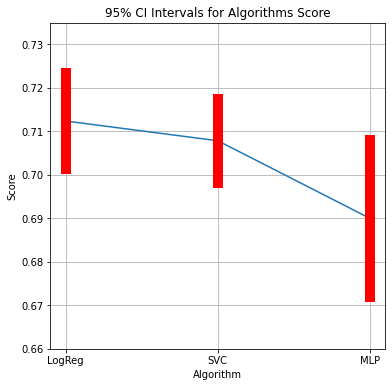

In [ ]:
log_reg_ci = GetNormalCI(log_reg_best_score, log_reg_best_std, 0.05)
svc_ci = GetNormalCI(svc_best_score, svc_best_std, 0.05)
mlp_ci = GetNormalCI(mlp_best_score, mlp_best_std, 0.05)

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot()
ax1.set_title('95% CI Intervals for Algorithms Score')
ax1.grid()
ax1.set_ylabel('Score')
ax1.set_xlabel('Algorithm')
ax1.plot(['LogReg', 'SVC', 'MLP'], [log_reg_best_score, svc_best_score, mlp_best_score])
ax1.plot(['LogReg', 'LogReg'], log_reg_ci, color='red', linewidth=10)
ax1.plot(['SVC', 'SVC'], svc_ci, color='red', linewidth=10)
ax1.plot(['MLP', 'MLP'], mlp_ci, color='red', linewidth=10)
ax1.set_ylim(0.66, 0.735)

print('LogReg CI length:', log_reg_ci[1] - log_reg_ci[0])
print('SVC    CI length:', svc_ci[1] - svc_ci[0])
print('MLP    CI length:', mlp_ci[1] - mlp_ci[0])

Для всех алгоритмов был проведен подбор оптимального параметра, отвечающего за силу регуляризации, результаты проиллюстрированы на графике выше.

И того, рейтинг алгоритмов по среднему значению качества по кросс-валидации:
1. LogReg | 0.712382233579393
2. SVC | 0.7078380672705008
3. MLP | 0.6899852878214585

По длине доверительных интервалов:
1. SVC | 0.019373918473564844
2. LogReg | 0.022090195382079125
3. MLP | 0.03615031227723642

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Особенность заключается в том, что количество золота по абсолютному значению сильно превосходит количество убитых крипов. Это будет давать низкую скорость сходимости при градиентном спуске, что, теоретически, будет иметь эффект на каждом из рассматриваемых алгоритмов. Масштабирование может решить эту проблему, поскольку все веса будут обновляться с одинаковой скоростью, из-за чего оптимум будем достигнут быстрее

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [22]:
from sklearn import preprocessing

In [23]:
standard_scaler = preprocessing.StandardScaler()
np_scaled = standard_scaler.fit_transform(new_train.drop(columns='radiant_won'))
new_train_scaled = pd.DataFrame(np_scaled, columns = new_train.drop(columns='radiant_won').columns)
new_train_scaled['mid'] = new_train.reset_index()['mid']
new_train_scaled = new_train_scaled.set_index('mid')
new_train_scaled['radiant_won'] = new_train['radiant_won']
new_train_scaled

,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,total_gold_ratio,r_std_gold,d_std_gold,std_gold_ratio,total_lh_ratio,r_std_lh,d_std_lh,std_lh_ratio,radiant_won
mid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.467829,0.885962,-1.024972,0.310126,1.308403,0.000774,0.008332,1.423661,-1.702024,1.835383,-1.249887,0.837252,-1.238365,1.573395,0.759007,0.322905,0.433798,2.512898,-1.299838,1.037951,-0.261843,-0.110565,1.178669,-0.681778,-0.884842,0.808355,1.121018,-0.315496,1
1,-1.184191,1.294899,-0.147528,0.256604,1.311335,2.635034,0.813586,-0.934141,0.333935,0.504626,-1.197948,1.876913,-0.669538,0.068543,1.071981,1.104237,-0.192552,-1.250049,0.169693,0.669657,-0.616305,0.132491,1.015126,-0.550569,0.131987,0.667124,-0.318718,0.455398,0
2,-0.357845,-1.518941,3.327967,0.283731,-0.807327,-0.715992,-1.269227,0.838117,-1.098361,-1.106490,0.308284,-1.086123,2.174597,0.795023,-0.179916,-1.135581,-0.766706,1.519898,-0.722522,-0.750905,1.860443,2.642602,-0.282520,1.423152,2.256073,0.613953,0.172925,0.061208,1
4,-0.305786,0.071779,0.828382,-0.713382,-1.388677,-0.110854,-0.370567,-0.454991,0.347433,-1.311280,0.100528,0.733285,0.933520,-0.190914,-1.171001,-0.093805,-0.923294,-0.204786,0.537076,-1.066586,0.056318,-0.372298,-1.011658,0.297091,1.168294,-0.529143,-1.078702,0.299219,1
5,0.117286,-1.176438,-1.074570,0.191352,-1.045585,0.500160,1.056895,0.707169,-0.030513,-0.727893,0.723796,-1.138106,-0.566114,0.172326,-1.223163,0.739616,-0.140356,1.363109,-0.775005,-0.645679,-1.542397,-0.775038,-0.755894,-0.225385,-1.231051,-0.468686,-0.236501,-0.330094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0.124618,2.443466,-0.016240,-0.102650,-1.298505,1.209581,-0.082815,0.217603,0.376678,-1.084575,1.087369,2.448727,0.157847,-0.761720,-1.275326,1.000060,-1.132077,0.422372,0.642043,-1.171813,0.073000,1.126074,-0.311947,0.599084,0.750586,1.501526,0.119773,0.593597,0
49940,2.315499,-0.016061,1.722602,-0.769103,1.666156,-0.716726,0.842964,-1.631288,0.621143,-1.121603,1.035430,-1.294055,1.398924,-0.761720,1.802255,-0.093805,2.312848,-1.197785,1.166875,-1.119199,2.769643,1.021870,0.320789,0.095654,0.296419,1.122269,1.565103,-0.353042,1
49941,-0.893833,0.532387,0.464421,0.674512,-0.238441,1.400523,-0.892588,-0.095629,0.486913,0.950479,0.152467,1.409066,0.778386,1.313938,-1.014514,1.104237,-1.340861,-0.884207,-0.565072,1.406245,-0.502831,-0.962775,-0.162141,-0.646487,1.251115,-0.061052,0.700415,-0.545067,1


In [24]:
X = new_train_scaled.drop(columns='radiant_won')
y = new_train_scaled['radiant_won']

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
C_values = np.linspace(0.05, 2.01, 20)
parameters = {'C': C_values}
clf_log_reg = GridSearchCV(log_reg, parameters, scoring='roc_auc', n_jobs=-1, verbose=True)
clf_log_reg.fit(X, y)
clf_log_reg.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.4s finished


0.7122592718164393

In [ ]:
log_reg_best_score = clf_log_reg.best_score_
log_reg_best_C = clf_log_reg.best_params_['C']
log_reg_best_std = clf_log_reg.cv_results_['std_test_score'][list(C_values).index(log_reg_best_C)]
print('Logistic Regression')
print(f'best score: {log_reg_best_score}')
print(f'best C-param value: {log_reg_best_C}')
print(f'std of best score: {log_reg_best_std}')

Logistic Regression
best score: 0.7122592718164393
best C-param value: 0.05
std of best score: 0.005737412874316176


In [ ]:
svc = SVC(probability=True)
C_values = np.linspace(0.1, 2, num=6)
parameters = {'C': C_values}
clf_svc = GridSearchCV(svc, parameters, verbose=True, scoring='roc_auc', n_jobs=-1)
clf_svc.fit(X, y)
clf_svc.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 47.3min finished


0.7024282460784707

In [ ]:
svc_best_score = clf_svc.best_score_
svc_best_C = clf_svc.best_params_['C']
svc_best_std = clf_svc.cv_results_['std_test_score'][list(C_values).index(svc_best_C)]
print('SVC')
print(f'best score: {svc_best_score}')
print(f'best C-param value: {svc_best_C}')
print(f'std of best score: {svc_best_std}')

SVC
best score: 0.7024282460784707
best C-param value: 0.1
std of best score: 0.006891480693587083


In [ ]:
mlp = MLPClassifier(max_iter=500, early_stopping=True, hidden_layer_sizes=(15, ))
alpha_values = np.logspace(-5, -1, num=10)
parameters = {'alpha': alpha_values}
clf_mlp = GridSearchCV(mlp, parameters, verbose=True, scoring="roc_auc", n_jobs=-1)
clf_mlp.fit(X, y)
clf_mlp.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.7s finished


0.7060698847421722

In [ ]:
mlp_best_score = clf_mlp.best_score_
mlp_best_alpha = clf_mlp.best_params_['alpha']
mlp_best_std = clf_mlp.cv_results_['std_test_score'][list(alpha_values).index(mlp_best_alpha)]
print('MLP')
print(f'best score: {mlp_best_score}')
print(f'best alpha-param value: {mlp_best_alpha}')
print(f'std of best score: {mlp_best_std}')

MLP
best score: 0.7060698847421722
best alpha-param value: 0.1
std of best score: 0.005480134589336197


Для масштабирования признаков была применена стандартизация.

Качество логистической регрессии осталось неизменным, SVM стал работать немного хуже, MLP - лучше. Заметно также уменьшение времени обучения алгоритмов.

Можно сделать вывод, что стандартизация данных, в этом случае, возымела, в целом, положительное влияние на качество работы алгоритмов.

Можно также предположить, что логистическая регрессия не почувствовала эффект от масштабирования данных в силу своей и без того быстрой сходимости, а MLP увеличил свое качество из-за того, что точнее стал сходиться к оптимуму.
SVC по умолчанию не имеет ограничений на количество итераций, поэтому от масштабирования приобрел лишь в скорости. Небольшую потерю качества можно объяснить воздействием потусторонних сил

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
C_values = np.linspace(0.05, 2.01, 20)
solver_values = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
parameters = {'C': C_values, 'solver': solver_values}
clf_log_reg = GridSearchCV(log_reg, parameters, scoring='roc_auc', n_jobs=-1, verbose=True)
clf_log_reg.fit(X, y)
clf_log_reg.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


0.7122599140029187

In [ ]:
log_reg_best_score = clf_log_reg.best_score_
log_reg_best_params = clf_log_reg.best_params_
log_reg_best_std = clf_log_reg.cv_results_['std_test_score'][list(C_values).index(log_reg_best_params['C'])]
print('Logistic Regression')
print(f'best score: {log_reg_best_score}')
print(f'best parameters: {log_reg_best_params}')
print(f'std of best score: {log_reg_best_std}')

Logistic Regression
best score: 0.7122599140029187
best parameters: {'C': 0.05, 'solver': 'sag'}
std of best score: 0.005737412874316176


In [ ]:
svc = SVC(probability=True)
C_values = np.linspace(0.1, 2, num=3)
kernel_values = ['rbf', 'linear']
gamma_values = ['scale', 'auto']
parameters = {'C': C_values, 'gamma': gamma_values, 'kernel': kernel_values}
clf_svc = GridSearchCV(svc, parameters, verbose=True, scoring='roc_auc', n_jobs=-1)
clf_svc.fit(X, y)
clf_svc.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 134.1min finished


0.7118646308189097

In [ ]:
svc_best_score = clf_svc.best_score_
svc_best_params = clf_svc.best_params_
svc_best_std = clf_svc.cv_results_['std_test_score'][list(C_values).index(svc_best_params['C'])]
print('SVC')
print(f'best score: {svc_best_score}')
print(f'best parameters: {svc_best_params}')
print(f'std of best score: {svc_best_std}')

SVC
best score: 0.7118646308189097
best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
std of best score: 0.006891480693587083


In [ ]:
mlp = MLPClassifier(max_iter=500, early_stopping=True)
alpha_values = np.logspace(-5, -1, num=8)
hidden_layer_sizes_values = [(15, ), (10, 15), (20, ), (20, 15)]
activation_values = ['relu', 'tanh']
parameters = {'alpha': alpha_values,
              'hidden_layer_sizes': hidden_layer_sizes_values,
              'activation': activation_values}
clf_mlp = GridSearchCV(mlp, parameters, verbose=True, scoring="roc_auc", n_jobs=-1)
clf_mlp.fit(X, y)
clf_mlp.best_score_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  5.2min finished


0.7082733467232568

In [ ]:
mlp_best_score = clf_mlp.best_score_
mlp_best_params = clf_mlp.best_params_
mlp_best_std = clf_mlp.cv_results_['std_test_score'][list(alpha_values).index(mlp_best_params['alpha'])]
print('MLP')
print(f'best score: {mlp_best_score}')
print(f'best parameters: {mlp_best_params}')
print(f'std of best score: {mlp_best_std}')

MLP
best score: 0.7082733467232568
best parameters: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (15,)}
std of best score: 0.007948134279574665


1. Для логистической регрессии были настроены коэффициент регуляризации и тип солвера
2. Для SVC - коэффициент регуляризации, типа ядра и гамма-параметр
3. Для MLP - функция активации, коэффициент регуляризации и количество-размер скрытых слоев
Полученные оптимальные параметры представлены выше.

Качество всех алгоритмов удалось улучшить!

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

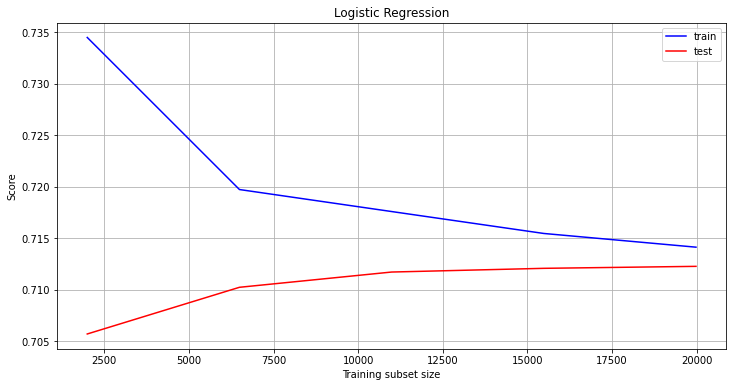

In [ ]:
from sklearn.model_selection import learning_curve

def BuildLearningCurve(estimator, title):
    train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X, y, scoring='roc_auc')
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
    ax1.set_title(title)
    ax1.set_ylabel('Score')
    ax1.set_xlabel('Training subset size')
    ax1.grid()
    ax1.plot(train_sizes_abs, train_scores.mean(axis=1), color='blue', label='train')
    ax1.plot(train_sizes_abs, test_scores.mean(axis=1), color='red', label='test')
    ax1.legend()
    train_sizes_abs
    
BuildLearningCurve(clf_log_reg.best_estimator_, 'Logistic Regression')

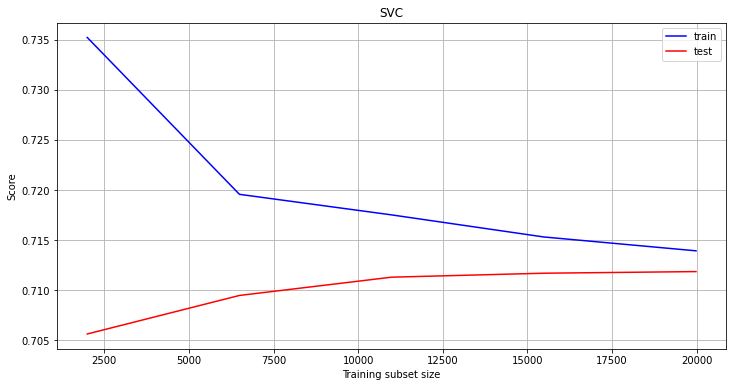

In [ ]:
BuildLearningCurve(clf_svc.best_estimator_, 'SVC')

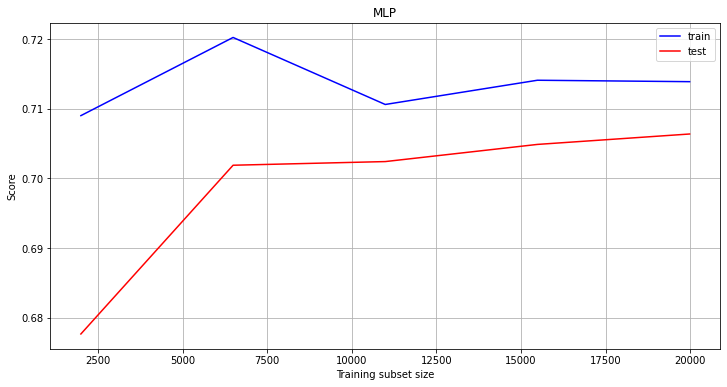

In [ ]:
BuildLearningCurve(clf_mlp.best_estimator_, 'MLP')

* С ростом числа объектов качество алгоритмов на тестовой выборке может убывать в случае переобучения алгоритма под обучающую. Также оно может убывать и на обучающей выборке (что мы и видим на графиках выше) в силу того, что алгоритму становиться тяжело "подстраиваться" под все объекты выборки.
* Знание качества на обучающей части выборки можно использовать в первую очередь для сравнения его с качеством на тестовой выборке (для подбора оптимального количества объектов). Также слишком высокое качество на обучающей выборке может свидетельствовать о переобучении
* Из графиков можно сделать вывод, что все 3 алгоритма вполне неплохо обучаются на 6000+ объектах, однако дальнейшее увеличение количества данных дает положительную динамику
* Графики LR и SVC выглядят так, будто алгоритмы достигли своего плато по качеству, и дальнейшее увеличение объема данных не принесет существенных дивидендов. График MLP же выглядит менее предсказуемо, и большее количество объектов, возможно, могло бы повысить его скор на тестовой выборке

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [26]:
heroes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heroes.csv')
heroes = heroes.set_index('mid')
for i in range(10):
    heroes = heroes.join(pd.get_dummies(heroes[f'player_{i}'], prefix=f'p_{i}_hero'))
    
heroes = heroes.drop(columns=[f'player_{i}' for i in range(10)])
heroes.sum(axis=1).value_counts()  # проверка

10    49948
dtype: int64

In [27]:
heroes

,p_0_hero_0,p_0_hero_1,p_0_hero_2,p_0_hero_3,p_0_hero_4,p_0_hero_5,p_0_hero_6,p_0_hero_7,p_0_hero_8,p_0_hero_9,p_0_hero_10,p_0_hero_11,p_0_hero_12,p_0_hero_13,p_0_hero_14,p_0_hero_15,p_0_hero_16,p_0_hero_17,p_0_hero_18,p_0_hero_19,p_0_hero_20,p_0_hero_21,p_0_hero_22,p_0_hero_23,p_0_hero_24,p_0_hero_25,p_0_hero_26,p_0_hero_27,p_0_hero_28,p_0_hero_29,p_0_hero_30,p_0_hero_31,p_0_hero_32,p_0_hero_33,p_0_hero_34,p_0_hero_35,p_0_hero_36,p_0_hero_37,p_0_hero_38,p_0_hero_39,...,p_9_hero_71,p_9_hero_72,p_9_hero_73,p_9_hero_74,p_9_hero_75,p_9_hero_76,p_9_hero_77,p_9_hero_78,p_9_hero_79,p_9_hero_80,p_9_hero_81,p_9_hero_82,p_9_hero_83,p_9_hero_84,p_9_hero_85,p_9_hero_86,p_9_hero_87,p_9_hero_88,p_9_hero_89,p_9_hero_90,p_9_hero_91,p_9_hero_92,p_9_hero_93,p_9_hero_94,p_9_hero_95,p_9_hero_96,p_9_hero_97,p_9_hero_98,p_9_hero_99,p_9_hero_100,p_9_hero_101,p_9_hero_102,p_9_hero_103,p_9_hero_104,p_9_hero_105,p_9_hero_106,p_9_hero_107,p_9_hero_108,p_9_hero_109,p_9_hero_110
mid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
train_extended = new_train_scaled.join(heroes)
train_extended

,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,total_gold_ratio,r_std_gold,d_std_gold,std_gold_ratio,total_lh_ratio,r_std_lh,d_std_lh,std_lh_ratio,radiant_won,p_0_hero_0,p_0_hero_1,p_0_hero_2,p_0_hero_3,p_0_hero_4,p_0_hero_5,p_0_hero_6,p_0_hero_7,p_0_hero_8,p_0_hero_9,p_0_hero_10,...,p_9_hero_71,p_9_hero_72,p_9_hero_73,p_9_hero_74,p_9_hero_75,p_9_hero_76,p_9_hero_77,p_9_hero_78,p_9_hero_79,p_9_hero_80,p_9_hero_81,p_9_hero_82,p_9_hero_83,p_9_hero_84,p_9_hero_85,p_9_hero_86,p_9_hero_87,p_9_hero_88,p_9_hero_89,p_9_hero_90,p_9_hero_91,p_9_hero_92,p_9_hero_93,p_9_hero_94,p_9_hero_95,p_9_hero_96,p_9_hero_97,p_9_hero_98,p_9_hero_99,p_9_hero_100,p_9_hero_101,p_9_hero_102,p_9_hero_103,p_9_hero_104,p_9_hero_105,p_9_hero_106,p_9_hero_107,p_9_hero_108,p_9_hero_109,p_9_hero_110
mid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.467829,0.885962,-1.024972,0.310126,1.308403,0.000774,0.008332,1.423661,-1.702024,1.835383,-1.249887,0.837252,-1.238365,1.573395,0.759007,0.322905,0.433798,2.512898,-1.299838,1.037951,-0.261843,-0.110565,1.178669,-0.681778,-0.884842,0.808355,1.121018,-0.315496,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.184191,1.294899,-0.147528,0.256604,1.311335,2.635034,0.813586,-0.934141,0.333935,0.504626,-1.197948,1.876913,-0.669538,0.068543,1.071981,1.104237,-0.192552,-1.250049,0.169693,0.669657,-0.616305,0.132491,1.015126,-0.550569,0.131987,0.667124,-0.318718,0.455398,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.357845,-1.518941,3.327967,0.283731,-0.807327,-0.715992,-1.269227,0.838117,-1.098361,-1.106490,0.308284,-1.086123,2.174597,0.795023,-0.179916,-1.135581,-0.766706,1.519898,-0.722522,-0.750905,1.860443,2.642602,-0.282520,1.423152,2.256073,0.613953,0.172925,0.061208,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.305786,0.071779,0.828382,-0.713382,-1.388677,-0.110854,-0.370567,-0.454991,0.347433,-1.311280,0.100528,0.733285,0.933520,-0.190914,-1.171001,-0.093805,-0.923294,-0.204786,0.537076,-1.066586,0.056318,-0.372298,-1.011658,0.297091,1.168294,-0.529143,-1.078702,0.299219,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.117286,-1.176438,-1.074570,0.191352,-1.045585,0.500160,1.056895,0.707169,-0.030513,-0.727893,0.723796,-1.138106,-0.566114,0.172326,-1.223163,0.739616,-0.140356,1.363109,-0.775005,-0.645679,-1.542397,-0.775038,-0.755894,-0.225385,-1.231051,-0.468686,-0.236501,-0.330094,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0.124618,2.443466,-0.016240,-0.102650,-1.298505,1.209581,-0.082815,0.217603,0.376678,-1.084575,1.087369,2.448727,0.157847,-0.761720,-1.275326,1.000060,-1.132077,0.422372,0.642043,-1.171813,0.073000,1.126074,-0.311947,0.599084,0.750586,1.501526,0.119773,0.593597,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49940,2.315499,-0.016061,1.722602,-0.769103,1.666156,-0.716726,0.842964,-1.631288,0.621143,-1.121603,1.035430,-1.294055,1.398924,-0.761720,1.802255,-0.093805,2.312848,-1.197785,1.166875,-1.119199,2.769643,1.021870,0.320789,0.095654,0.296419,1.122269,1.565103,-0.353042,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [29]:
X = train_extended.drop(columns='radiant_won')
y = train_extended['radiant_won']

In [42]:
log_reg = LogisticRegression(max_iter=1000)
C_values = [0.03] + list(np.logspace(-4, 0, 15))
solver_values = ['liblinear', 'lbfgs', 'sag']
parameters = {'C': C_values, 'solver': solver_values}
clf_log_reg = GridSearchCV(log_reg, parameters, scoring='roc_auc', n_jobs=-1, verbose=True)
clf_log_reg.fit(X, y)
clf_log_reg.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.1min finished


0.7460115739028209

In [43]:
log_reg_best_score = clf_log_reg.best_score_
log_reg_best_params = clf_log_reg.best_params_
log_reg_best_std = clf_log_reg.cv_results_['std_test_score'][list(C_values).index(log_reg_best_params['C'])]
print('Logistic Regression')
print(f'best score: {log_reg_best_score}')
print(f'best parameters: {log_reg_best_params}')
print(f'std of best score: {log_reg_best_std}')

Logistic Regression
best score: 0.7460115739028209
best parameters: {'C': 0.07196856730011514, 'solver': 'liblinear'}
std of best score: 0.006502330488060307


На полном объеме данных SVC работает слишком долго, поэтому обучим его на урезанной выборке

In [35]:
svc = SVC(probability=True, kernel='linear')
C_values = np.logspace(-3, -1, num=3)
parameters = {'C': C_values}
clf_svc = GridSearchCV(svc, parameters, verbose=True, scoring='roc_auc', n_jobs=-1)
clf_svc.fit(X.iloc[:3000], y.iloc[:3000])
clf_svc.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.5min finished


0.7271217568437099

In [36]:
svc_best_score = clf_svc.best_score_
svc_best_params = clf_svc.best_params_
svc_best_std = clf_svc.cv_results_['std_test_score'][list(C_values).index(svc_best_params['C'])]
print('SVC')
print(f'best score: {svc_best_score}')
print(f'best parameters: {svc_best_params}')
print(f'std of best score: {svc_best_std}')

SVC
best score: 0.7271217568437099
best parameters: {'C': 0.01}
std of best score: 0.013107130169767662


In [37]:
mlp = MLPClassifier(max_iter=500, early_stopping=True, random_state=8)
alpha_values = np.logspace(-6, -4, num=4)
hidden_layer_sizes_values = [(15, ), (20, ), (10, 15)]
activation_values = ['tanh', 'relu']
parameters = {'alpha': alpha_values,
              'hidden_layer_sizes': hidden_layer_sizes_values,
              'activation': activation_values}
clf_mlp = GridSearchCV(mlp, parameters, verbose=True, scoring='roc_auc', n_jobs=-1)
clf_mlp.fit(X, y)
clf_mlp.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.0min finished


0.741950679399969

In [38]:
mlp_best_score = clf_mlp.best_score_
mlp_best_params = clf_mlp.best_params_
mlp_best_std = clf_mlp.cv_results_['std_test_score'][list(alpha_values).index(mlp_best_params['alpha'])]
print('MLP')
print(f'best score: {mlp_best_score}')
print(f'best parameters: {mlp_best_params}')
print(f'std of best score: {mlp_best_std}')

MLP
best score: 0.741950679399969
best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15,)}
std of best score: 0.006870174478558489


Как видно, новая порция признаков заметно улучшила качество всех алгоритмов.

Логистическая регрессия по-прежнему дает наилучший результат.

SVC стал работать слишком долго (не справляется с объемом данных), из-за чего пришлось обучить его лишь на малой доле выборки, что сказалось на результате, который, однако, все равно отличается в лучшую сторону от всех полученных ранее.

MLP, как и логистическая регрессия, заметно улучшил точность предсказаний.

Переобучения не наблюдается

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [44]:
from sklearn.base import BaseEstimator, ClassifierMixin

class BlendLogRegMLP(BaseEstimator, ClassifierMixin):
    def __init__(self, clf_first = None, clf_second = None, alpha=0.5):
        if clf_first:
            self.clf_first = clf_first
        if clf_second:
            self.clf_second = clf_second
        self.alpha = alpha
    
    def fit(self, X, y):
        self.clf_first.fit(X, y)
        self.clf_second.fit(X, y)
        
    def predict(self, X):
        return self.clf_first.predict(X) if self.alpha >= 0.5 else self.clf_second.predict(X)
        
    def predict_proba(self, X):
        return (self.clf_first.predict_proba(X) * self.alpha + 
                self.clf_second.predict_proba(X) * (1 - self.alpha)) / 2


**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [45]:
blend = BlendLogRegMLP(clf_log_reg.best_estimator_, clf_mlp.best_estimator_)
alpha_values = np.linspace(0, 1, 11)
parameters = {'alpha': alpha_values}
clf_blend = GridSearchCV(blend, parameters, verbose=True, scoring='roc_auc', n_jobs=2)
clf_blend.fit(X, y)
clf_blend.best_score_, clf_blend.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done  55 out of  55 | elapsed:  3.1min finished


(0.7460170824277557, {'alpha': 0.9})

In [46]:
import seaborn as sns

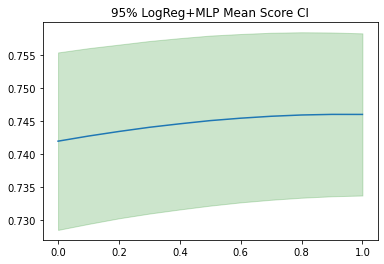

In [48]:
mean_scores = clf_blend.cv_results_['mean_test_score']
ax1 = sns.lineplot(x=alpha_values, y=mean_scores)
ax1.set_title('95% LogReg+MLP Mean Score CI')
low_ci, high_ci = GetNormalCI(mean_scores, clf_blend.cv_results_['std_test_score'], 0.05)
ax1.fill_between(x=alpha_values, y1=low_ci, y2=high_ci, alpha=0.2, color='green')
sns.set(rc={'figure.figsize':(12, 6)})

Простой блендинг может влиять на итоговое качество потому, что множества объектов, на которые два разных классификатора дают правильные ответы, могут не совпадать. Поэтому в ситуации, когда один из классификаторов дает плохое предсказание, второй может "спасти" его своим. Стоит отметить, что работает это в обе стороны, и, соответственно, хорошее предсказание одного классификатора может быть испорчено предсказанием второго.

В нашем случае блендинг логистической регрессии и MLP дал совсем небольшой прирост к качеству по сравнению с моделями, обученными по отдельности

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [49]:
from sklearn.model_selection import cross_val_score

In [51]:
clf_blend.cv_results_['mean_test_score']
clf_results = pd.DataFrame({'LogReg': cross_val_score(clf_log_reg.best_estimator_, X, y, scoring='roc_auc'),
                            'SVC': cross_val_score(clf_svc.best_estimator_, X.iloc[:3000], y.iloc[:3000], scoring='roc_auc', n_jobs=2),
                            'MLP': cross_val_score(clf_mlp.best_estimator_, X, y, scoring='roc_auc'),
                            'LogReg+MLP': cross_val_score(clf_blend.best_estimator_, X, y, scoring='roc_auc')})
clf_results

,LogReg,SVC,MLP,LogReg+MLP
0,0.753040,0.735649,0.747775,0.752983
1,0.747793,0.736664,0.745841,0.747996
2,0.750978,0.724295,0.748603,0.751115
3,0.735575,0.702603,0.731636,0.735514
4,0.742671,0.736398,0.735899,0.742478


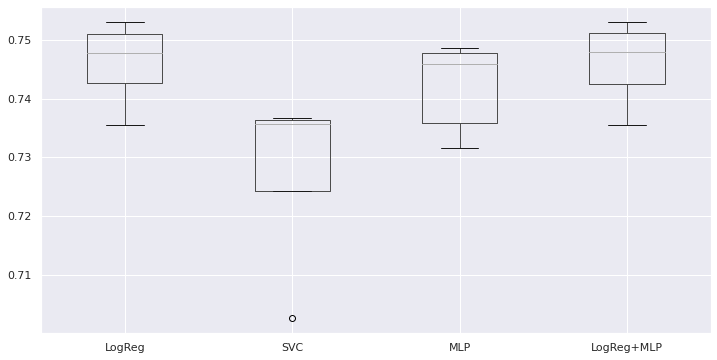

In [52]:
clf_results.boxplot()

**Выводы**

1. Логистическая регрессия показала самые высокие и устойчивые результаты на входных данных. Стоит также отметить, что скорость ее обучения выгодно отличалась от других скорости обучения других алгоритмов. LR оказалась не сильно чувствительна к подбору параметров и давала достаточно хороший результат почти при любом их наборе.

2. SVC на данном датасете проявила себя хуже всех из тройки алгоритмов, проигрывая, чаще всего, и по качеству, и, что наиболее сильно выделялось, по скорости обучения. На начальных этапах, при малом количестве данных, алгоритм выигрывал у MLP и практически не отставал от логистической регрессии, однако, с увеличением объема выборки, сдал позиции.  Отметим, что подбор гиперпараметров не играл большой роли в качестве алгоритма, а также доверительный интервал среднего скора по кросс-валидации у SCV был довольно укзим, что свидельствует о стабильности алгоритма.

3. MLP оказался наиболее чувствительным к набору гиперпараметров алгоритмом (коих у него как раз очень много). При хорошем их подборе он выдавал очень близкое к логистической регрессии качество, в то время как при неудачном их подборе мог давать совершенно другой результат. Скорость обучения оказалась довольно приемлемой, что позволило побольше поиграться с гиперпараметрами алгоритма и выявить некоторые тенденции.

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.